In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Age"] = df["Age"].mean()

In [9]:
del df["Cabin"]

In [10]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

In [11]:
df["Sex"] = labelenc.fit_transform(df[["Sex"]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
df['Embarked']= labelenc.fit_transform(df['Embarked'])

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,29.699118,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,29.699118,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,29.699118,0,0,111369,30.0000,0


In [14]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
y = df["Survived"].copy()
x = df.drop(columns=["Survived","Name","Ticket"])

In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(random_state=1)

In [21]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [22]:
pred = clf.predict(x_test)
pred2 = clf.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score
print("Test Accuracy",accuracy_score(y_test,pred))
print("Train Accuracy",accuracy_score(y_train,pred2))

Test Accuracy 0.7982062780269058
Train Accuracy 1.0


In [24]:
from sklearn import tree

[Text(415.4244239936441, 795.9857142857143, 'X[2] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(162.2574152542373, 757.1571428571428, 'X[1] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(67.38559322033899, 718.3285714285714, 'X[6] <= 28.856\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(53.199152542372886, 679.5, 'X[6] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(46.105932203389834, 640.6714285714286, 'X[0] <= 760.5\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(28.372881355932204, 601.8428571428572, 'X[0] <= 48.0\ngini = 0.127\nsamples = 44\nvalue = [3, 41]'),
 Text(14.186440677966102, 563.0142857142857, 'X[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(7.093220338983051, 524.1857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(21.279661016949152, 524.1857142857143, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(42.559322033898304, 563.0142857142857, 'X[6] <= 13.25\ngini = 0.093\nsampl

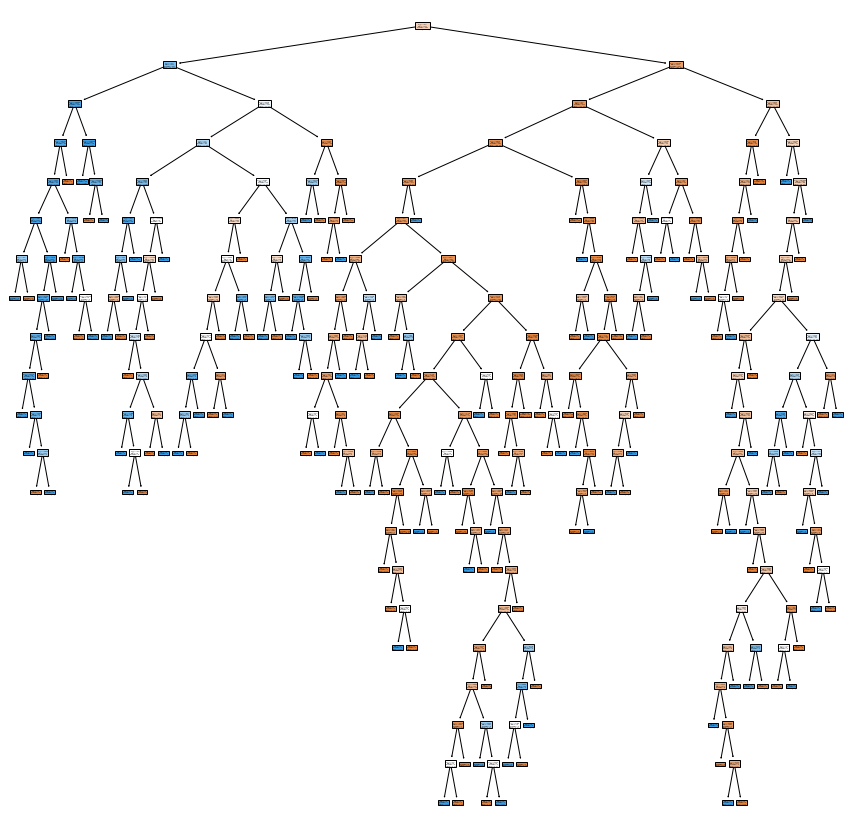

In [25]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

In [26]:
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14240922624956154


In [28]:
ccp_alphas

array([0.        , 0.00072511, 0.00088711, 0.0008982 , 0.00094098,
       0.000998  , 0.00100044, 0.0011976 , 0.0011976 , 0.0011976 ,
       0.0012475 , 0.0012475 , 0.00125374, 0.00126064, 0.0012667 ,
       0.00126747, 0.00128315, 0.00128315, 0.00128315, 0.00128315,
       0.00131166, 0.0013171 , 0.00133067, 0.00133067, 0.00133843,
       0.00135198, 0.00141822, 0.00144156, 0.00147632, 0.00149701,
       0.00157449, 0.00159681, 0.00173733, 0.00174651, 0.00179641,
       0.00182244, 0.00199601, 0.00204116, 0.00209594, 0.00212908,
       0.00223402, 0.00224551, 0.00229394, 0.00249501, 0.00249501,
       0.00249501, 0.00261188, 0.00269461, 0.00271124, 0.00274257,
       0.00277184, 0.00292477, 0.00401157, 0.00447475, 0.00454383,
       0.00549124, 0.00618467, 0.00932435, 0.01233496, 0.02985151,
       0.14240923])

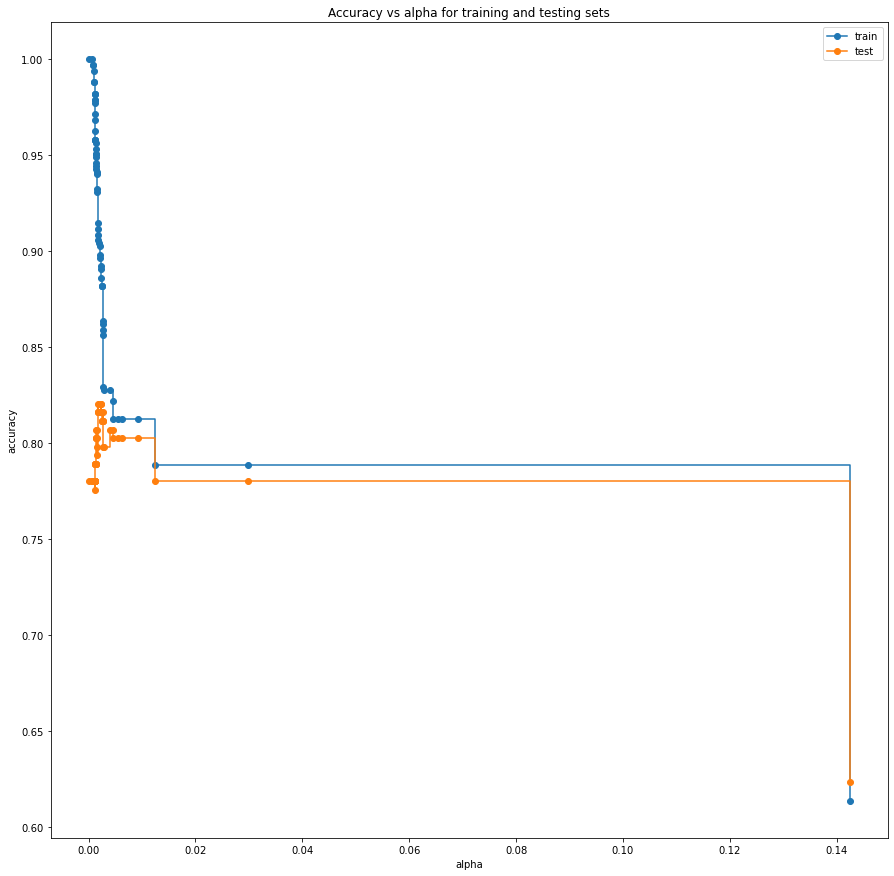

In [29]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label = "train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label = "test", drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
accuracy_list = []
highest_accuracy_alpha = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    print("Accuracy for alpha",i,"=",accuracy_score(y_test,pred))
    accuracy_list.append(accuracy_score(y_test,pred))
print("\n")
print("Maximum accuracy is of",max(accuracy_list))
print("\n\n")
x = max(accuracy_list)
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    if accuracy_score(y_test,pred) == x:
        print("Max accuracy is attained is at alpha value", i)
        highest_accuracy_alpha.append(i)

Accuracy for alpha 0.0 = 0.7802690582959642
Accuracy for alpha 0.0007251122754491018 = 0.7802690582959642
Accuracy for alpha 0.0008871146595697494 = 0.7802690582959642
Accuracy for alpha 0.0008982035928143716 = 0.7802690582959642
Accuracy for alpha 0.000940975192472198 = 0.7802690582959642
Accuracy for alpha 0.000998003992015968 = 0.7802690582959642
Accuracy for alpha 0.0010004381480940552 = 0.7802690582959642
Accuracy for alpha 0.0011976047904191614 = 0.7802690582959642
Accuracy for alpha 0.0011976047904191614 = 0.7802690582959642
Accuracy for alpha 0.0011976047904191614 = 0.7802690582959642
Accuracy for alpha 0.00124750499001996 = 0.7802690582959642
Accuracy for alpha 0.00124750499001996 = 0.7802690582959642
Accuracy for alpha 0.0012537425149700605 = 0.7802690582959642
Accuracy for alpha 0.001260636621493855 = 0.7802690582959642
Accuracy for alpha 0.0012666973744818056 = 0.7757847533632287
Accuracy for alpha 0.0012674650698602796 = 0.7802690582959642
Accuracy for alpha 0.001283147989

In [31]:
print(highest_accuracy_alpha)

[0.0017373336257626502, 0.00223401586808494, 0.002245508982035928]


In [32]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=highest_accuracy_alpha[1])
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print("Accuracy for alpha",highest_accuracy_alpha[1],"=",accuracy_score(y_test,pred))

Accuracy for alpha 0.00223401586808494 = 0.820627802690583


[Text(396.91071428571433, 786.2785714285714, 'X[2] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(222.5357142857143, 728.0357142857142, 'X[1] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(195.96428571428572, 669.7928571428571, 'gini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(249.10714285714286, 669.7928571428571, 'X[6] <= 23.35\ngini = 0.499\nsamples = 102\nvalue = [49, 53]'),
 Text(166.07142857142858, 611.55, 'X[7] <= 1.5\ngini = 0.469\nsamples = 80\nvalue = [30, 50]'),
 Text(79.71428571428572, 553.3071428571428, 'X[0] <= 486.5\ngini = 0.368\nsamples = 37\nvalue = [9, 28]'),
 Text(53.142857142857146, 495.0642857142857, 'gini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(106.28571428571429, 495.0642857142857, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(252.42857142857144, 553.3071428571428, 'X[0] <= 428.0\ngini = 0.5\nsamples = 43\nvalue = [21, 22]'),
 Text(159.42857142857144, 495.0642857142857, 'X[0] <= 396.0\ngini = 0.488\nsamples =

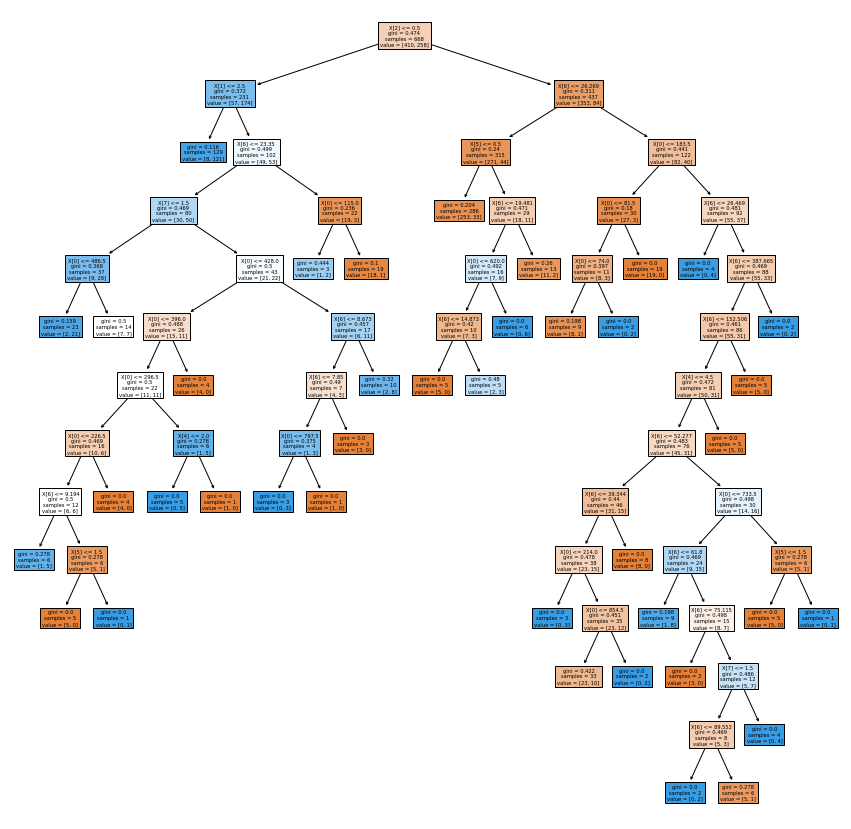

In [33]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":[2,3,4,5,6,7,8,9,10,11,None],
    "max_leaf_nodes":[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    "ccp_alpha":[0.        , 0.00085543, 0.00088711, 0.00094098, 0.00094932,
       0.00096682, 0.000998  , 0.0011976 , 0.0011976 , 0.0011976 ,
       0.0012475 , 0.0012475 , 0.00125374, 0.00126064, 0.0012667 ,
       0.00126747, 0.00128315, 0.00128315, 0.00128315, 0.00131166,
       0.0013171 , 0.00133067, 0.00133067, 0.00133843, 0.00135198,
       0.00141822, 0.00144156, 0.00147632, 0.00149701, 0.00157449,
       0.00159681, 0.00173733, 0.00174651, 0.00179641, 0.00182244,
       0.00199601, 0.00204116, 0.00209594, 0.00212908, 0.00223402,
       0.00224551, 0.00229394, 0.00249501, 0.00249501, 0.00249501,
       0.00261188, 0.00269461, 0.00271124, 0.00274257, 0.00277184,
       0.00292477, 0.00401157, 0.00447475, 0.00454383, 0.00549124,
       0.00618467, 0.00932435, 0.01233496, 0.02985151, 0.14240923]
}

In [36]:
grid = GridSearchCV(clf, param_grid=param_dict, cv=6, n_jobs=-1)

In [37]:
grid.fit(x_train,y_train)

GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(ccp_alpha=0.00223401586808494,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.00085543, 0.00088711, 0.00094098,
                                       0.00094932, 0.00096682, 0.000998,
                                       0.0011976, 0.0011976, 0.0011976,
                                       0.0012475, 0.0012475, 0.00125374,
                                       0.00126064, 0.0012667, 0.00126747,
                                       0.00128315, 0.00128315, 0.00128315,
                                       0.00131166, 0.0013171, 0.00133067,
                                       0.00133067, 0.00133843, 0.00135198,
                                       0.00141822, 0.00144156, 0.00147632,
                                       0.00149701, 0.00157449, ...],
                         'criterion': ['gini', 'entropy'],
                  

In [38]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8,
                       random_state=0)

In [39]:
grid.best_score_

0.7978871728871729

In [40]:
grid.best_params_

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [41]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=4, max_leaf_nodes=8)

In [42]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8)

In [43]:
pred = clf.predict(x_test)

In [44]:
accuracy_score(y_test,pred)

0.8026905829596412

# Fine-tuned model

[Text(328.82142857142856, 733.86, 'X[2] <= 0.5\nentropy = 0.962\nsamples = 668\nvalue = [410, 258]'),
 Text(119.57142857142857, 570.78, 'X[1] <= 2.5\nentropy = 0.806\nsamples = 231\nvalue = [57, 174]'),
 Text(59.785714285714285, 407.70000000000005, 'entropy = 0.335\nsamples = 129\nvalue = [8, 121]'),
 Text(179.35714285714286, 407.70000000000005, 'X[6] <= 23.35\nentropy = 0.999\nsamples = 102\nvalue = [49, 53]'),
 Text(119.57142857142857, 244.62, 'entropy = 0.954\nsamples = 80\nvalue = [30, 50]'),
 Text(239.14285714285714, 244.62, 'entropy = 0.575\nsamples = 22\nvalue = [19, 3]'),
 Text(538.0714285714286, 570.78, 'X[6] <= 26.269\nentropy = 0.706\nsamples = 437\nvalue = [353, 84]'),
 Text(418.5, 407.70000000000005, 'X[5] <= 0.5\nentropy = 0.583\nsamples = 315\nvalue = [271, 44]'),
 Text(358.7142857142857, 244.62, 'entropy = 0.516\nsamples = 286\nvalue = [253, 33]'),
 Text(478.2857142857143, 244.62, 'entropy = 0.958\nsamples = 29\nvalue = [18, 11]'),
 Text(657.6428571428571, 407.700000000

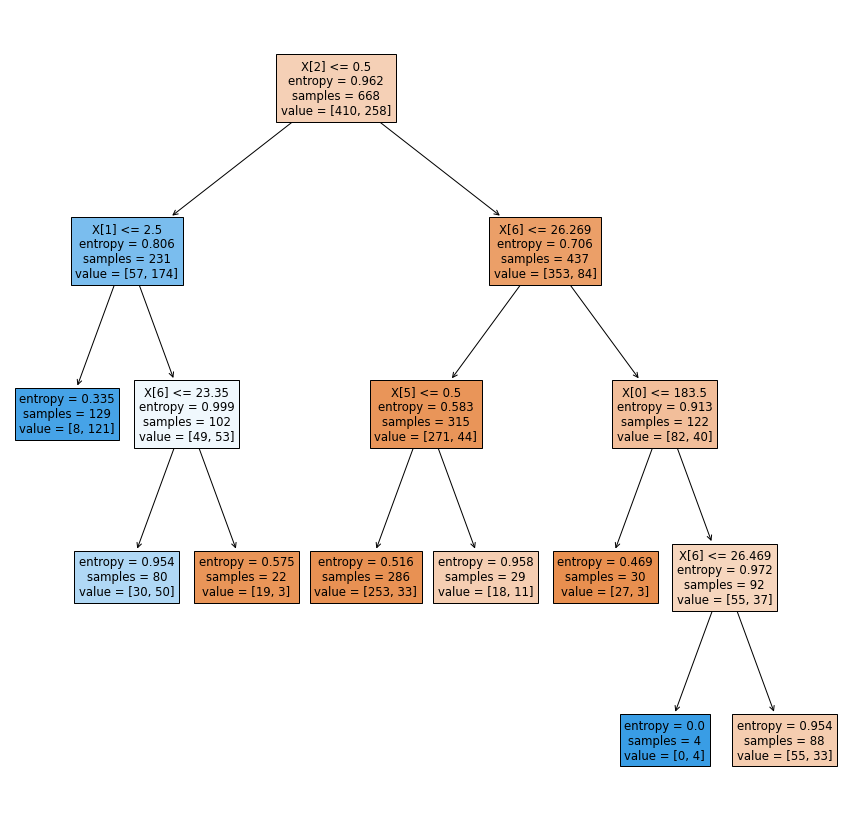

In [45]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

In [46]:
pred = clf.predict(x_train)
print(pred)

[0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 